# Delay Analysis of Air Astana

## According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.



## But, what are the causes for these delays?



## In order to answer this question, we are going to analyze the provided dataset, for 2019 until July 2020 their causes for delay, diversion and cancellation;                                            

In [113]:
import pandas as pd
import numpy as np

In [114]:
FlightDelays = pd.read_excel('FlightDelays.xlsx', encoding ='utf-8')

In [146]:
FlightDelays.count()

FlightNumber                  74725
FlightDate                    74725
OriginalFlightDate            74725
ScheduledDepartureDateTime    74725
DepartureStation              74725
CarrierID                     74725
FlightPostfix                  1975
DelayCode                     74725
SubDelayID                    74725
TypeOfDelay                   74725
DelayTime                     74725
dtype: int64

In [110]:
##import needed libraries & float format definition
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
import unicodecsv

In [4]:
FlightDelays.head()

,FlightNumber,FlightDate,OriginalFlightDate,ScheduledDepartureDateTime,DepartureStation,CarrierID,FlightPostfix,DelayCode,SubDelayID,TypeOfDelay,DelayTime
0,109,2019-01-01,2019-01-01,2019-01-01 12:20:00,ALA,1,NaN,89,25,1,1
1,153,2019-01-01,2019-01-01,2019-01-01 02:15:00,ALA,1,NaN,89,25,1,2
2,301,2019-01-01,2019-01-01,2019-01-01 12:00:00,ALA,1,NaN,89,25,1,5
3,307,2019-01-01,2019-01-01,2019-01-01 12:05:00,ALA,1,NaN,93,0,2,1
4,311,2019-01-01,2019-01-01,2019-01-01 12:40:00,ALA,1,NaN,89,25,1,7


In [5]:
FlightDelays.TypeOfDelay.unique()

array([1, 2])

## Delays have two type: Departure Delays = 1, Arrival Delays = 2

In [6]:
DelayCodes = pd.read_excel('DelayCodes.xlsx', encoding = 'utf-8')

In [7]:
DelayCodes [DelayCodes['ID'] == 89]

,ID,CategoryID,Description
75,89,14,RESTRICTIONS AT AIRPORT OF DEPARTURE


In [8]:
DelayCategories = pd.read_excel('DelayCategories.xlsx', encoding = 'utf-8')

In [9]:
DelayCategories.head()

,ID,Code,Description
0,1,OTHR,Others
1,2,SCH,Schedules
2,3,P&B,Passenger & Baggage
3,4,C&M,Cargo & Mail
4,5,ML,Mail only


In [10]:
FlightDelays.DelayCode.unique()

array([89, 93, 68,  8, 15, 41, 75, 85, 51, 55, 33, 36, 86, 81, 13, 46,  9,
       35, 95, 32, 16,  0, 71, 34, 65, 77, 88, 72, 62, 74, 91, 47, 87, 18,
       42, 37, 11,  7, 64, 96, 52, 67, 12, 31, 38, 49, 43, 45, 92, 94,  1,
        5, 66, 80,  2, 63, 76, 17, 21, 22, 61, 57, 19, 14, 27, 26, 73, 69,
       82, 59, 25, 24, 28, 39, 23, 29, 99])

In [11]:
FlightDelays['DelayCode'].value_counts().head(5)

93    41425
89    11273
0      2263
15     1890
41     1700
Name: DelayCode, dtype: int64

In [12]:
# if ID is 0, It is not delay
FlightDelays = FlightDelays[~ FlightDelays.DelayCode.isin([0])]

In [13]:
FlightDelays['DelayCode'].value_counts().head(5)

93    41425
89    11273
15     1890
41     1700
75     1202
Name: DelayCode, dtype: int64

In [14]:
#Only Departure Delays
DepDelays = FlightDelays[FlightDelays['TypeOfDelay'] == 1]

In [15]:
#Only Arrival Delays
ArrDelays = FlightDelays[FlightDelays['TypeOfDelay'] == 2]

In [16]:
DepDelays.head()

,FlightNumber,FlightDate,OriginalFlightDate,ScheduledDepartureDateTime,DepartureStation,CarrierID,FlightPostfix,DelayCode,SubDelayID,TypeOfDelay,DelayTime
0,109,2019-01-01,2019-01-01,2019-01-01 12:20:00,ALA,1,NaN,89,25,1,1
1,153,2019-01-01,2019-01-01,2019-01-01 02:15:00,ALA,1,NaN,89,25,1,2
2,301,2019-01-01,2019-01-01,2019-01-01 12:00:00,ALA,1,NaN,89,25,1,5
4,311,2019-01-01,2019-01-01,2019-01-01 12:40:00,ALA,1,NaN,89,25,1,7
7,853,2019-01-01,2019-01-01,2019-01-01 05:40:00,ALA,1,NaN,89,25,1,2


In [17]:
PopularDelays = DepDelays['DelayCode'].value_counts().head(5)

# The result same with general delays (1 and 2 types)

In [18]:
ArrDelays['DelayCode'].value_counts().head(5)

93    25991
1         1
Name: DelayCode, dtype: int64

In [19]:
PopularDelays

93    15434
89    11273
15     1890
41     1700
75     1202
Name: DelayCode, dtype: int64

In [20]:
PopularDelays.to_frame()

,DelayCode
93,15434
89,11273
15,1890
41,1700
75,1202


In [21]:
PopularDelays.index.rename('ID', inplace=True)

In [22]:
PopularDelays.to_frame()

,DelayCode
ID,
93,15434
89,11273
15,1890
41,1700
75,1202


In [23]:
DelayCodes[DelayCodes['ID']==93]

,ID,CategoryID,Description
78,93,15,"AIRCRAFT ROTATION, late arrival"


In [24]:
PopularDelays = pd.merge( PopularDelays, DelayCodes, on = 'ID')

In [25]:
PopularDelays

,ID,DelayCode,CategoryID,Description
0,93,15434,15,"AIRCRAFT ROTATION, late arrival"
1,89,11273,14,RESTRICTIONS AT AIRPORT OF DEPARTURE
2,15,1890,3,"BOARDING, discrepancies, missing checked passe..."
3,41,1700,7,AIRCRAFT DEFECTS
4,75,1202,12,DE-ICING OF AIRCRAFT


In [26]:
PopularDelays.rename(columns = {'Count': 'SumOfDelays'}, inplace = True)


In [27]:
PopularDelays

,ID,DelayCode,CategoryID,Description
0,93,15434,15,"AIRCRAFT ROTATION, late arrival"
1,89,11273,14,RESTRICTIONS AT AIRPORT OF DEPARTURE
2,15,1890,3,"BOARDING, discrepancies, missing checked passe..."
3,41,1700,7,AIRCRAFT DEFECTS
4,75,1202,12,DE-ICING OF AIRCRAFT


In [28]:
DelayCategories.rename(columns = {'ID': 'CategoryID'}, inplace = True)

In [29]:
DelayCategories.head()

,CategoryID,Code,Description
0,1,OTHR,Others
1,2,SCH,Schedules
2,3,P&B,Passenger & Baggage
3,4,C&M,Cargo & Mail
4,5,ML,Mail only


In [30]:
pd.merge(PopularDelays, DelayCategories, on = 'CategoryID')

,ID,DelayCode,CategoryID,Description_x,Code,Description_y
0,93,15434,15,"AIRCRAFT ROTATION, late arrival",REAC,Reactionary
1,89,11273,14,RESTRICTIONS AT AIRPORT OF DEPARTURE,AUTH,Airport & Goverment Authorities
2,15,1890,3,"BOARDING, discrepancies, missing checked passe...",P&B,Passenger & Baggage
3,41,1700,7,AIRCRAFT DEFECTS,TECH,Technical & Aircraft equipment
4,75,1202,12,DE-ICING OF AIRCRAFT,WTH,Weather


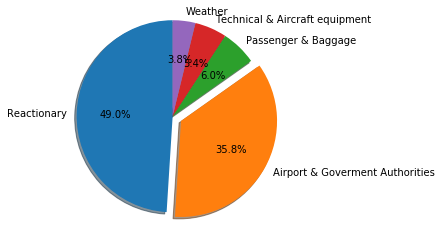

In [31]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Reactionary', 'Airport & Goverment Authorities', 'Passenger & Baggage', 'Technical & Aircraft equipment', 'Weather'
sizes = [15434, 11273, 1890, 1700, 1202]
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
Other = DepDelays['DelayCode'].value_counts().iloc[5:]

In [33]:
Other = Other.to_frame()

In [34]:
Other

,DelayCode
86,1010
16,943
34,885
68,880
8,771
...,...
28,1
29,1
19,1
69,1


In [35]:
Other.index.rename('ID', inplace=True)

In [36]:
Other

,DelayCode
ID,
86,1010
16,943
34,885
68,880
8,771
...,...
28,1
29,1
19,1


In [37]:
Other.rename(columns = {'DelayCode': 'CountOfDelays'}, inplace = True)

In [38]:
Other

,CountOfDelays
ID,
86,1010
16,943
34,885
68,880
8,771
...,...
28,1
29,1
19,1


In [39]:
Other['CountOfDelays'].sum()

14971

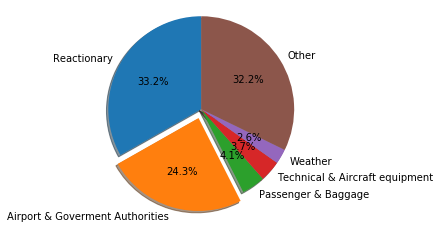

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Reactionary', 'Airport & Goverment Authorities', 'Passenger & Baggage', 'Technical & Aircraft equipment', 'Weather', 'Other'
sizes = [15434, 11273, 1890, 1700, 1202, 14971]
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [44]:
import calendar
import datetime

In [47]:
pd.DatetimeIndex(FlightDelays['FlightDate']).month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='FlightDate', length=72462)

In [73]:
FlightDelays2019 = FlightDelays[(FlightDelays['FlightDate'] > '2019-01-01') & (FlightDelays['FlightDate'] < '2019-12-31')]

In [74]:
FlightDelays2019['Month'] = pd.DatetimeIndex(FlightDelays2019['FlightDate']).month

/Users/alinaachilova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
FlightDelays2019.head()

,FlightNumber,FlightDate,OriginalFlightDate,ScheduledDepartureDateTime,DepartureStation,CarrierID,FlightPostfix,DelayCode,SubDelayID,TypeOfDelay,DelayTime,Month
89,111,2019-01-02,2019-01-02,2019-01-02 04:25:00,ALA,1,NaN,89,25,1,3,1
90,111,2019-01-02,2019-01-02,2019-01-02 04:25:00,ALA,1,NaN,93,0,2,1,1
91,127,2019-01-02,2019-01-02,2019-01-02 06:15:00,ALA,1,NaN,93,0,2,3,1
92,307,2019-01-02,2019-01-02,2019-01-02 02:10:00,ALA,1,NaN,93,0,2,1,1
93,349,2019-01-02,2019-01-02,2019-01-02 02:30:00,ALA,1,NaN,75,24,1,9,1


In [108]:
FlightDelays2019['Month'].value_counts()

12    8263
11    5946
6     5467
9     5106
7     4980
8     4941
10    4156
1     3971
2     3618
3     3282
4     3018
5     2651
Name: Month, dtype: int64

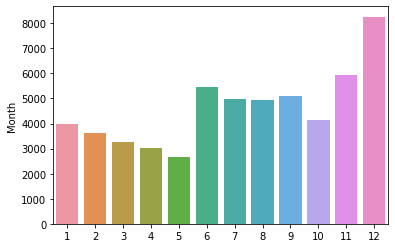

In [112]:
sns.barplot(x=FlightDelays2019.Month.value_counts().index, y=FlightDelays2019.Month.value_counts())


# It means if you flight in November or December, you should be ready to your flight can be delay

In [61]:
FlightDelays2019[FlightDelays2019.DelayCode.isin([0])]

,FlightNumber,FlightDate,OriginalFlightDate,ScheduledDepartureDateTime,DepartureStation,CarrierID,FlightPostfix,DelayCode,SubDelayID,TypeOfDelay,DelayTime,Month


In [138]:
Flights = pd.read_excel('Flights.xlsx', encoding = 'utf-8')

In [142]:
Flights = Flights[(Flights['FlightDate'] >= '2019-01-01') & (Flights['FlightDate'] <= '2019-12-31')]

In [143]:
Flights.count()

OriginalFlightDate            49101
FlightDate                    49101
CarrierID                     49101
FlightNumber                  49101
FlightPostfix                 49101
FlightStatusID                49101
FlightTypeID                  49101
AircraftID                    48928
TailNumber                    48930
DepartureStation              49101
ArrivalStation                49101
OriginalArrivalStation        49101
ScheduledDepartureDateTime    49101
ETD                           16369
ATD                           47919
STA                           49101
ETA                           47895
ATA                           47919
TakeOffTime                   47741
TouchDownTime                 47741
IsCancelled                   49101
BlockTime                     47919
DoorCloseTime                 47919
dtype: int64

In [144]:
FlightsDec = Flights[(Flights['FlightDate'] >= '2019-12-01') & (Flights['FlightDate'] <= '2019-12-31')]

In [145]:
FlightsDec.count()

OriginalFlightDate            4432
FlightDate                    4432
CarrierID                     4432
FlightNumber                  4432
FlightPostfix                 4432
FlightStatusID                4432
FlightTypeID                  4432
AircraftID                    4424
TailNumber                    4424
DepartureStation              4432
ArrivalStation                4432
OriginalArrivalStation        4432
ScheduledDepartureDateTime    4432
ETD                           2168
ATD                           4304
STA                           4432
ETA                           4303
ATA                           4304
TakeOffTime                   4280
TouchDownTime                 4280
IsCancelled                   4432
BlockTime                     4304
DoorCloseTime                 4304
dtype: int64

# From these results we see that, for instanse, they are 4432 flights in December 2019 at Air Astana, but it were almost 8000 delays, it means, one flight has more than one delay. If flight stays at airport more than 15 minutes from scheduled departure or arrival time, it should be noted as delay. 